In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pickle
import sys

import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pprint
import pyedflib

project_root = '..'
sys.path.append(project_root)

from sleep.data.loader import load_dataset
from sleep.detection.feeder_dataset import FeederDataset
from sleep.detection.predicted_dataset import PredictedDataset
from sleep.detection import metrics
from sleep.common import constants, pkeys, checks
from sleep.data import utils

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

RESULTS_PATH = os.path.join(project_root, 'results')
SEED_LIST = [123, 234, 345, 456]

CUSTOM_COLOR = {'red': '#c62828', 'grey': '#455a64', 'blue': '#0277bd', 'green': '#43a047'} 

In [6]:
ckpt_folder = '20190506_bsf'
task_mode = constants.N2_RECORD
dataset_name = constants.MASS_SS_NAME
seed_id = 0
chosen_thr = 0.5
which_expert = 1
verbose = False

dataset = load_dataset(dataset_name)
all_train_ids = dataset.train_ids
full_ckpt_folder = '%s_%s_train_%s' % (ckpt_folder, task_mode, dataset_name)
ckpt_path = os.path.abspath(os.path.join(
    RESULTS_PATH,
    'predictions_%s' % dataset_name,
    full_ckpt_folder,
    'bsf',
    'seed%d' % seed_id
))
print('Loading from %s' % ckpt_path)
filename = os.path.join(
    ckpt_path,
    'prediction_%s_%s.pkl' % (task_mode, constants.VAL_SUBSET))
with open(filename, 'rb') as handle:
    prediction_val = pickle.load(handle)  # Predicted Dataset
    
# Validation split
_, val_ids = utils.split_ids_list(
    all_train_ids, seed=SEED_LIST[seed_id], verbose=verbose)
# Prepare expert labels
data_val = FeederDataset(
    dataset, val_ids, task_mode, which_expert=which_expert)
# Prepare model predictions
prediction_val.set_probability_threshold(chosen_thr)

print('Val IDs:', data_val.get_ids(), prediction_val.get_ids())

val_ids = data_val.get_ids()

# Get stamps
events_val = data_val.get_stamps()
detections_val = prediction_val.get_stamps()

Train size: 11. Test size: 4
Train subjects: 
 [1, 3, 5, 7, 9, 10, 11, 14, 17, 18, 19]
Test subjects: 
 [2, 6, 12, 13]
Dataset mass_ss with 15 patients.
Loading from checkpoint... Loaded
Loading from /home/ntapia/Projects/GitNico/sleep-rnn/results/predictions_mass_ss/20190506_bsf_n2_train_mass_ss/bsf/seed0
Val IDs: [5, 11, 19] [5, 11, 19]



Subject ID 5
Number of events 341
Number of detections 321
Number of matched 262
Number of UFP 59, Number of UFN 79
Recall at IoU 0.0: 0.7683284457478006
Precision at IoU 0.0: 0.8161993769470405
F1score at IoU 0.0: 0.7915407854984894
F1score at IoU 0.3: 0.7915407854984894
Pages of UFP: [ 158  164  170  174  182  184  189  276  296  317  324  342  363  391
  393  406  418  423  424  425  428  466  477  506  515  515  642  644
  646  686  695  712  716  959  963  986  997 1005 1008 1021 1033 1114
 1120 1120 1129 1152 1162 1164 1268 1289 1290 1292 1299 1306 1307 1317
 1321 1352 1527]

Loading states
Hypnogram size (1563,)
Pages states unique values: ['1' '2' '3' '4' '?' 'R' 'W']


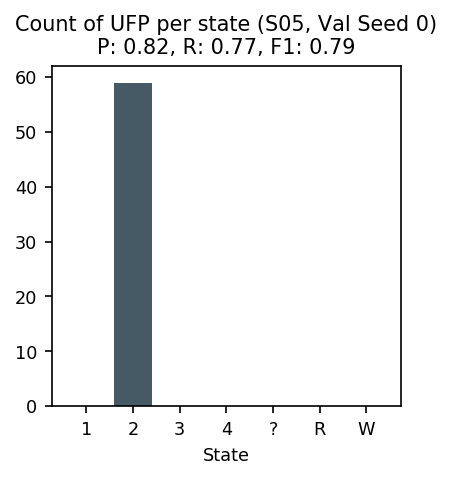

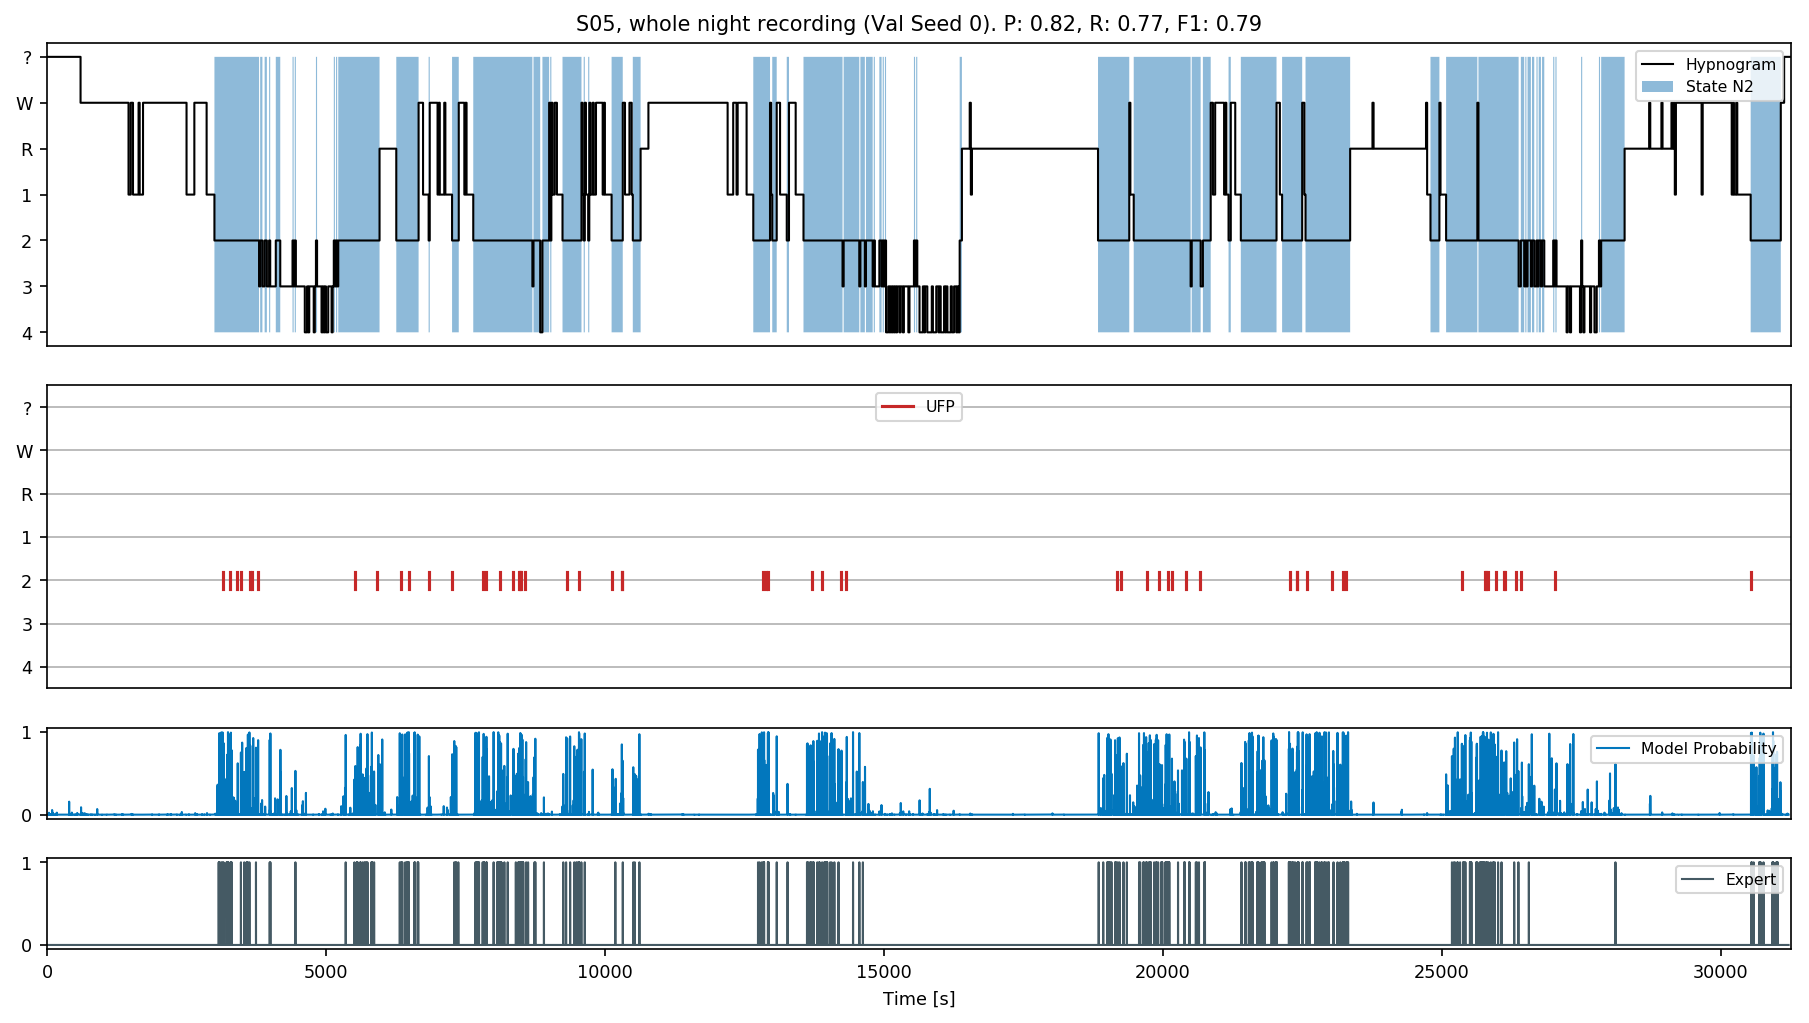


Subject ID 11
Number of events 606
Number of detections 870
Number of matched 563
Number of UFP 307, Number of UFN 43
Recall at IoU 0.0: 0.929042904290429
Precision at IoU 0.0: 0.6471264367816092
F1score at IoU 0.0: 0.7628726287262872
F1score at IoU 0.3: 0.7628726287262872
Pages of UFP: [  53   53   54   54   58   59   59   60   61   62   65   65   68   70
   71   73   75   75   76   79   80   80   81   87   87   93  100  116
  142  143  144  145  146  147  150  153  153  189  191  193  195  198
  198  202  209  209  211  211  212  214  216  219  228  231  232  233
  238  269  270  270  271  274  274  274  276  278  284  285  286  286
  291  292  294  294  296  299  301  302  305  306  307  308  309  312
  313  315  317  318  318  319  320  321  321  321  323  324  326  326
  327  328  329  329  332  332  336  336  337  337  338  339  342  343
  349  372  483  488  489  490  491  498  500  501  505  508  509  512
  513  513  514  518  522  525  525  526  526  530  531  536  536  536
 

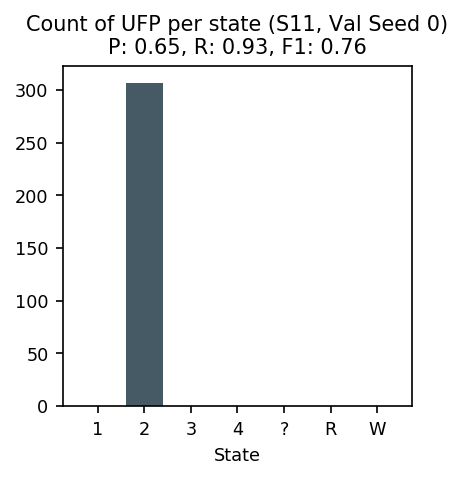

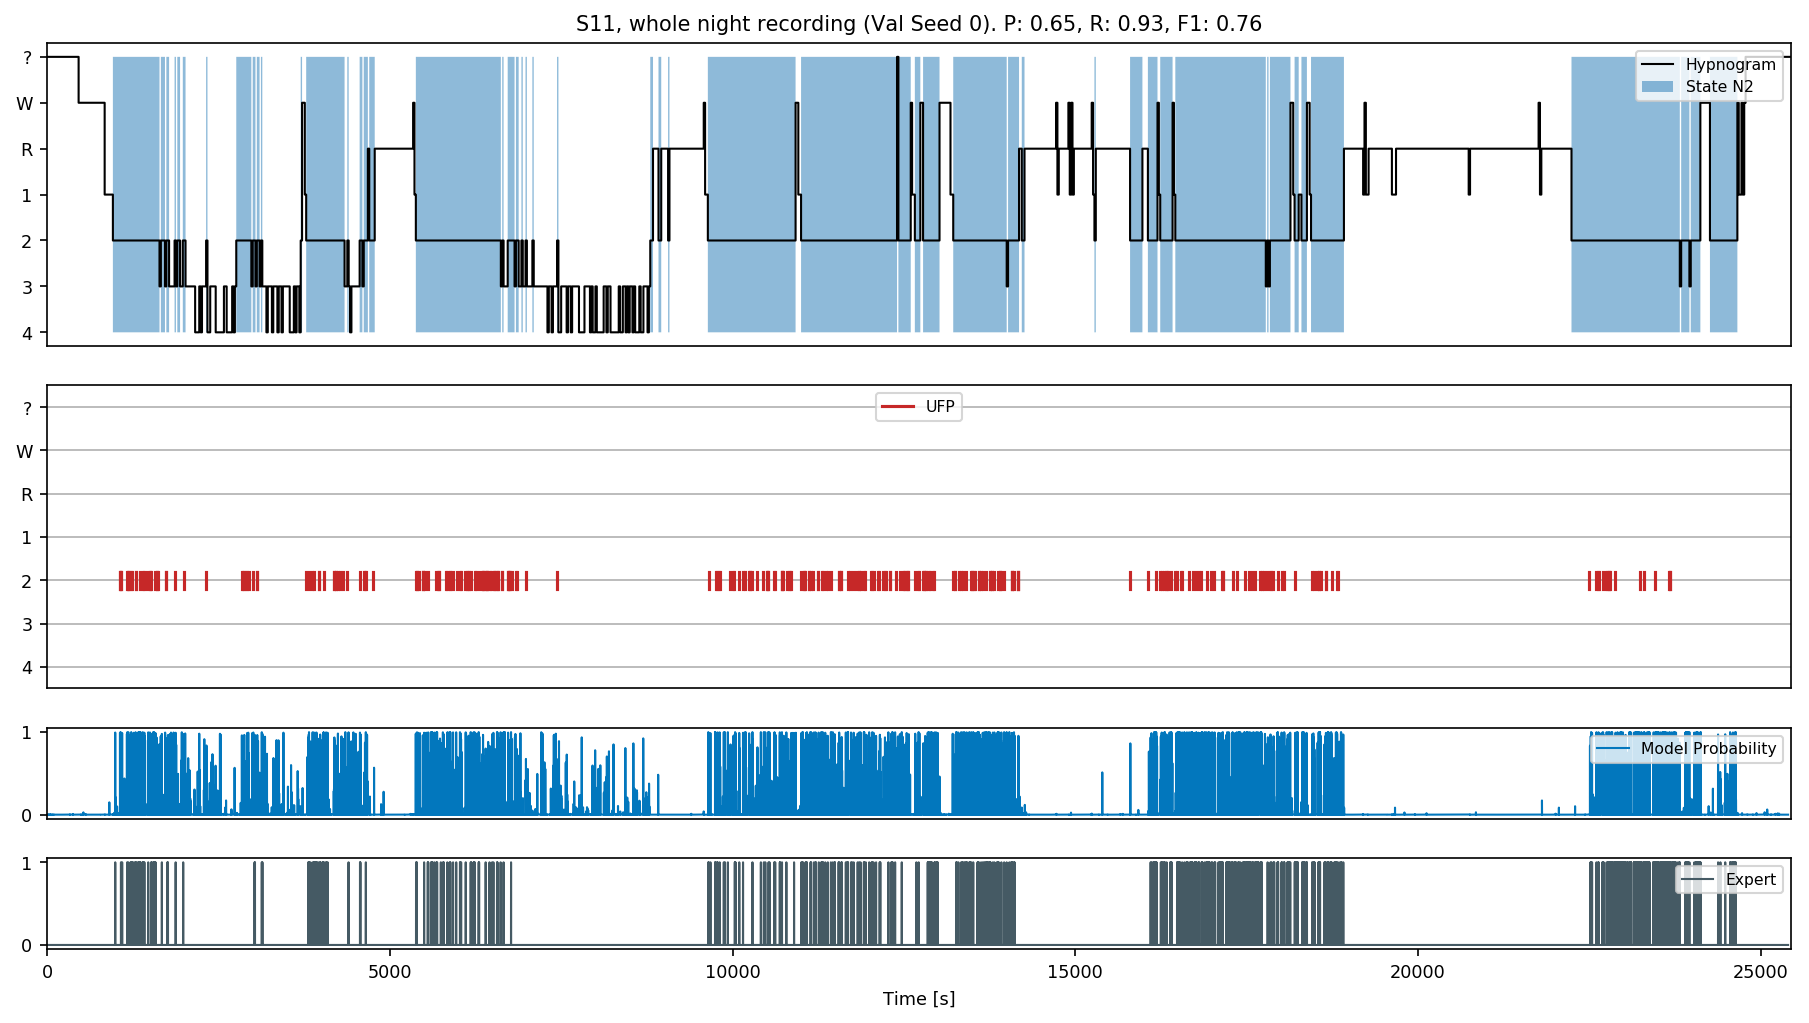


Subject ID 19
Number of events 315
Number of detections 520
Number of matched 302
Number of UFP 218, Number of UFN 13
Recall at IoU 0.0: 0.9587301587301588
Precision at IoU 0.0: 0.5807692307692308
F1score at IoU 0.0: 0.7233532934131737
F1score at IoU 0.3: 0.7233532934131737
Pages of UFP: [  68   84   85   88   88   92   93   96  113  114  115  121  125  128
  130  132  134  134  138  148  150  152  159  161  171  174  181  193
  217  230  246  255  263  265  265  341  341  348  349  359  362  366
  367  371  375  376  382  383  396  413  441  445  459  463  500  504
  517  525  534  535  542  547  547  550  558  567  571  573  581  585
  591  592  595  596  599  601  606  609  612  622  627  632  761  762
  767  772  784  785  793  795  796  797  798  800  801  807  809  814
  815  817  817  819  820  824  825  827  830  850  853  854  857  867
  869  870  873  874  875  879  890  894  895  896  897  903  903  904
  910  910  911  912  912  917  919  920  923  923  925  931  932  933


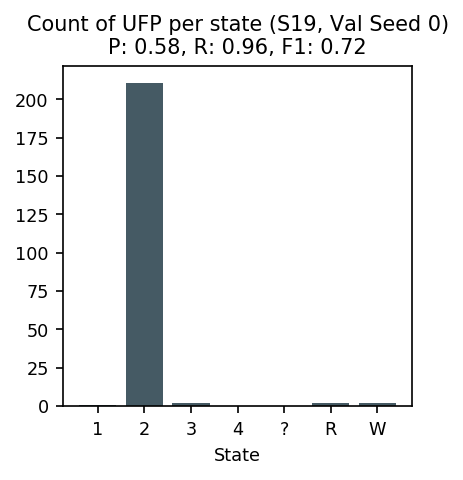

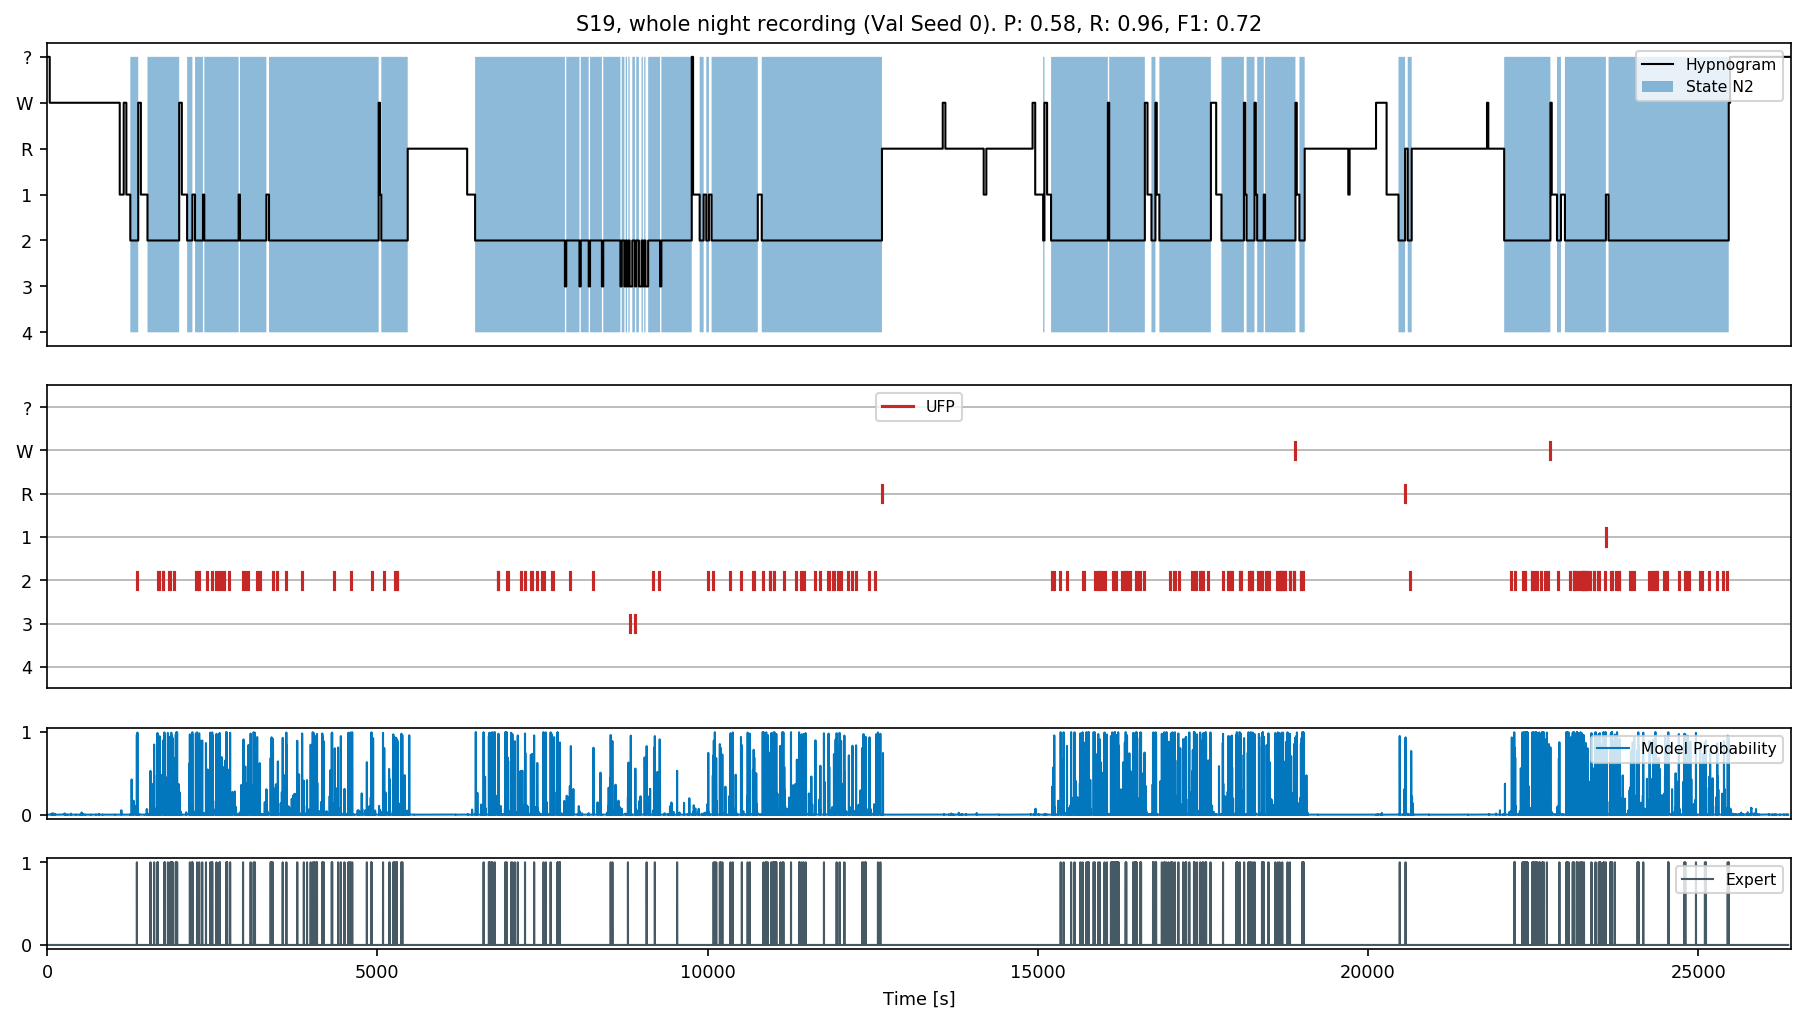

In [17]:
for sub_idx in range(len(val_ids)):

    subject_id = val_ids[sub_idx]
    print('\nSubject ID', subject_id)
    events = events_val[sub_idx]
    detections = detections_val[sub_idx]
    iou_array, idx_array = metrics.matching(events, detections)
    n_detections = detections.shape[0]
    n_events = events.shape[0]
    n_ufn = (idx_array == -1).sum()
    n_matched = n_events - n_ufn
    n_ufp = n_detections - n_matched
    n_matched_at_03 = (iou_array >= 0.3).sum()
    f1_at_03 = 2 * n_matched_at_03 / (n_events + n_detections)
    p_at_03 = n_matched_at_03 / n_detections
    r_at_03 = n_matched_at_03 / n_events
    print('Number of events', n_events)
    print('Number of detections', n_detections)
    print('Number of matched', n_matched)
    print('Number of UFP %d, Number of UFN %d' % (n_ufp, n_ufn))
    print('Recall at IoU 0.0:', n_matched / n_events)
    print('Precision at IoU 0.0:', n_matched / n_detections)
    print('F1score at IoU 0.0:', 2*n_matched / (n_events + n_detections))
    print('F1score at IoU 0.3:', f1_at_03)

    ufp_idx = [i for i in range(n_detections) if i not in idx_array]
    detections_ufp = detections[ufp_idx, :]
    centers_ufp = np.mean(detections_ufp, axis=1)
    pages_ufp = np.floor(centers_ufp / dataset.page_size).astype(np.int32)
    print('Pages of UFP:', pages_ufp)

    # Read states for subset of pages
    print('\nLoading states')
    numerical_state_values = {
        '1': -1, '2': -2, '3': -3, '4': -4, 'R': 0, 'W': 1, '?': 2
    }
    pages_subset_states = dataset.get_subject_hypnogram(subject_id)
    print('Hypnogram size', pages_subset_states.shape)

    print('Pages states unique values:', np.unique(pages_subset_states))

    # Get state of UFP
    states_ufp = pages_subset_states[pages_ufp]

    fs = dataset.fs
    down_factor = prediction_val.params[pkeys.TOTAL_DOWNSAMPLING_FACTOR]
    fs_proba = fs / down_factor
    
    # Probability
    my_proba = prediction_val.probabilities_dict[subject_id]
    my_proba_time = np.arange(my_proba.shape[0]) / fs_proba

    # Expert stamps
    my_expert = utils.stamp2seq(events, 0, my_proba.shape[0] * down_factor + 1)
    my_expert_time = np.arange(my_expert.shape[0]) / fs


    numerical_state = np.zeros(pages_subset_states.shape)
    state_time = np.arange(pages_subset_states.shape[0]) * dataset.page_duration
    all_state_key_list = dataset.state_ids
    for state_key in all_state_key_list:
        np.place(numerical_state, pages_subset_states==state_key, numerical_state_values[state_key])

    # plot
    fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=150)
    ax.set_title('Count of UFP per state (S%02d, Val Seed %d)\nP: %1.2f, R: %1.2f, F1: %1.2f' 
                 % (subject_id, seed_id, p_at_03, r_at_03, f1_at_03), fontsize=10)
    unique, counts = np.unique(states_ufp, return_counts=True)
    for state_key in all_state_key_list:
        if state_key not in unique:
            unique = np.concatenate([unique, [state_key]])
            counts = np.concatenate([counts, [0]])
    sorted_idx = np.argsort(unique)
    unique = unique[sorted_idx]
    counts = counts[sorted_idx]
    ax.bar(unique, counts, width=0.8, bottom=None, facecolor=CUSTOM_COLOR['grey'])
    ax.set_xlabel('State', fontsize=8.5)
    ax.tick_params(labelsize=8.5)
    plt.show()

    # plot
    
    fig = plt.figure(figsize=(15, 8), dpi=150)
    gs = gridspec.GridSpec(4, 1, height_ratios=[2, 2, 0.6, 0.6])

    # Hypnogram
    ax = fig.add_subplot(gs[0])
    ax.set_title('S%02d, whole night recording (Val Seed %d). P: %1.2f, R: %1.2f, F1: %1.2f' 
                 % (subject_id, seed_id, p_at_03, r_at_03, f1_at_03), fontsize=10)
    
    tmp_state_time = []
    tmp_numerical_state = []
    for j in range(state_time.shape[0]):
        tmp_numerical_state.append(numerical_state[j])
        tmp_numerical_state.append(numerical_state[j])
        tmp_state_time.append(state_time[j])
        tmp_state_time.append(state_time[j] + dataset.page_duration)
    tmp_state_time = np.asarray(tmp_state_time)
    tmp_numerical_state = np.asarray(tmp_numerical_state)
    
    max_time = np.max([my_expert_time[-1], my_proba_time[-1], tmp_state_time[-1]])

    ax.plot(tmp_state_time, tmp_numerical_state, color='k', zorder=2, linewidth=1, label='Hypnogram')
    ax.fill_between(tmp_state_time, 6 * (tmp_numerical_state==-2).astype(int) - 4, -4, alpha=0.5, zorder=1, label='State N2')
    ax.set_yticks([numerical_state_values[my_key] for my_key in numerical_state_values.keys()])
    ax.set_xlim([0, state_time[-1]])
    ax.set_yticklabels(list(numerical_state_values.keys()))
    ax.legend(loc='upper right', fontsize=7.5)
    ax.set_xticks([])
    ax.set_xlim([0, max_time])
    ax.tick_params(labelsize=8.5)

    # detailed UFP
    ax = fig.add_subplot(gs[1])
    ax.set_ylim([-4.5, 2.5])
    ax.set_xticks([])
    ax.set_xlim([0, max_time])
    ax.set_yticks([numerical_state_values[my_key] for my_key in numerical_state_values.keys()])
    ax.set_yticklabels(list(numerical_state_values.keys()))
    label_set = False
    for j, state_key in enumerate(all_state_key_list):
        for k, page in enumerate(pages_ufp):
            if states_ufp[k] == state_key:
                if label_set:
                    label = None
                else:
                    label = 'UFP'
                label_set = True
                page_time = page * dataset.page_duration
                ax.plot(
                    [page_time, page_time], 
                    [numerical_state_values[state_key] - 0.2, numerical_state_values[state_key] + 0.2], 
                    color=CUSTOM_COLOR['red'], label=label, linewidth=1.5)
    if label_set:
        ax.legend(loc='upper center', fontsize=7.5)
    ax.yaxis.grid()
    ax.tick_params(labelsize=8.5)

    # Model probability
    ax = fig.add_subplot(gs[2])
    ax.plot(my_proba_time, my_proba, label='Model Probability',color=CUSTOM_COLOR['blue'], linewidth=1)
    ax.set_yticks([0, 1])
    ax.legend(loc='upper right', fontsize=7.5)
    ax.set_xticks([])
    ax.set_xlim([0, max_time])
    ax.tick_params(labelsize=8.5)

    # Expert stamps
    ax = fig.add_subplot(gs[3])
    ax.plot(my_expert_time, my_expert, label='Expert',color=CUSTOM_COLOR['grey'], linewidth=1)
    ax.set_yticks([0, 1])
    ax.legend(loc='upper right', fontsize=7.5)
    ax.set_xlim([0, max_time])
    ax.tick_params(labelsize=8.5)
    ax.set_xlabel('Time [s]', fontsize=8.5)

    plt.show()